In [2]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [133]:
import json
from pprint import pprint

tmp_list = []
# with open('/Users/danielkershaw/PycharmProjects/DiffusionSimulation/output/lr-test/part-00000') as data_file:
with open('/Users/danielkershaw/Downloads/lr-reddit-comment-mean-2') as data_file:
# with open('/Users/danielkershaw/Downloads/lr-twitter-geo-mean-2') as data_file:
    for l in data_file:
        data = json.loads(l)
        tmp_list.append(data)
df = pd.DataFrame(tmp_list)


In [134]:
df.head()

,combination,observation_level,result_mean,result_var,target
0,all,1,194.691195,2.426693e+05,user_target
1,all,1,3928.789346,9.213833e+08,activation_target
2,basic,1,206.681551,2.389792e+05,user_target
3,basic,1,4030.732719,9.747207e+08,activation_target
4,exposure,1,278.335352,2.989873e+05,user_target


In [135]:
dft = df.drop('result_mean', 1).set_index(['target','combination','observation_level']).unstack()
dft.columns = dft.columns.droplevel()

dft_error = df.drop('result_var', 1).set_index(['target','combination','observation_level']).unstack()
dft_error.columns = dft_error.columns.droplevel()

# dft.sortlevel(level=1).plot(legend=False)

In [136]:
dft.T

target            activation_target                                            \
combination                     all         basic     community      exposure   
observation_level                                                               
0                      9.759525e+08  9.739720e+08  9.747680e+08  9.783481e+08   
1                      9.213833e+08  9.747207e+08  9.321309e+08  9.742435e+08   
2                      9.453270e+08  9.752351e+08  9.375528e+08  9.758668e+08   
3                      9.276650e+08  9.696040e+08  9.345905e+08  9.753576e+08   
4                      8.397663e+08  9.587291e+08  8.381108e+08  1.133052e+09   
5                      8.245229e+08  9.429208e+08  8.163827e+08  9.636136e+08   
6                      7.974631e+08  9.410564e+08  7.767588e+08  9.790693e+08   
7                      7.980316e+08  9.263412e+08  7.772824e+08  9.752003e+08   
8                      8.073210e+08  9.338805e+08  7.843386e+08  1.027980e+09   
9                      7.575892e+08  9.309109e+08  7.340586e+08  9.747332e+08   
10                     7.459357e+08  9.266645e+08  7.195337e+08  9.746027e+08   
11                     7.444100e+08  9.274999e+08  7.189911e+08  9.768874e+08   
12                     7.440659e+08  9.251210e+08  7.230377e+08  5.089554e+08   
13                     7.435463e+08  9.188781e+08  7.128009e+08  3.583460e+08   
14                     7.445181e+08  9.189104e+08  7.326941e+08  3.766833e+08   
15                     7.564758e+08  9.175545e+08  7.367865e+08  3.874120e+08   
16                     7.564875e+08  9.172785e+08  7.374976e+08  4.025962e+08   
17                     7.555242e+08  9.114752e+08  7.373904e+08  4.261547e+08   
18                     7.582154e+08  8.992598e+08  7.301688e+08  9.987700e+08   
19                     7.596436e+08  9.062687e+08  7.381609e+08  9.825049e+08   
20                     7.590502e+08  8.967946e+08  7.382054e+08  9.995099e+08   
21                     7.618460e+08  9.038227e+08  7.408035e+08  9.952637e+08   
22                     7.672220e+08  9.050207e+08  7.442400e+08  1.113181e+09   
23                     7.590380e+08  8.957695e+08  7.333361e+08  7.088852e+08   
24                     7.621269e+08  8.960933e+08  7.280022e+08  7.342398e+08   
25                     7.664558e+08  8.975224e+08  7.325066e+08  7.381052e+08   
26                     7.702902e+08  8.970665e+08  7.371030e+08  7.247403e+08   
27                     7.738503e+08  8.987208e+08  7.404423e+08  7.216498e+08   
28                     7.772751e+08  8.981136e+08  7.533213e+08  7.258503e+08   
29                     7.834236e+08  8.990222e+08  7.578814e+08  7.238895e+08   
30                     7.714902e+08  8.943729e+08  7.604596e+08  7.288171e+08   

target                            user_target                               \
combination                time           all         basic      community   
observation_level                                                            
0                  9.774752e+08  2.702763e+05  2.733945e+05  247089.306338   
1                  9.640553e+08  2.426693e+05  2.389792e+05  232891.007367   
2                  9.730635e+08  4.603452e+04  6.728038e+04   81289.410020   
3                  9.719260e+08  3.460184e+04  3.801746e+04   41305.059303   
4                  9.714920e+08  2.417302e+04  2.484852e+04   25352.799488   
5                  9.751110e+08  1.784191e+04  1.708060e+04   17629.772706   
6                  9.730605e+08  1.152657e+04  1.070718e+04   16924.416308   
7                  9.739138e+08  7.410096e+03  1.012418e+04   14811.433755   
8                  9.707165e+08  7.408367e+03  8.085753e+03   14467.277129   
9                  9.775920e+08  5.907286e+03  6.405418e+03   13513.314886   
10                 9.733243e+08  5.172341e+03  5.369497e+03   13434.263942   
11                 9.736464e+08  4.642120e+03  5.463757e+03   15194.519723   
12                 9.738945e+08  4.267673e+03  4.280486e+03   11937.430053 

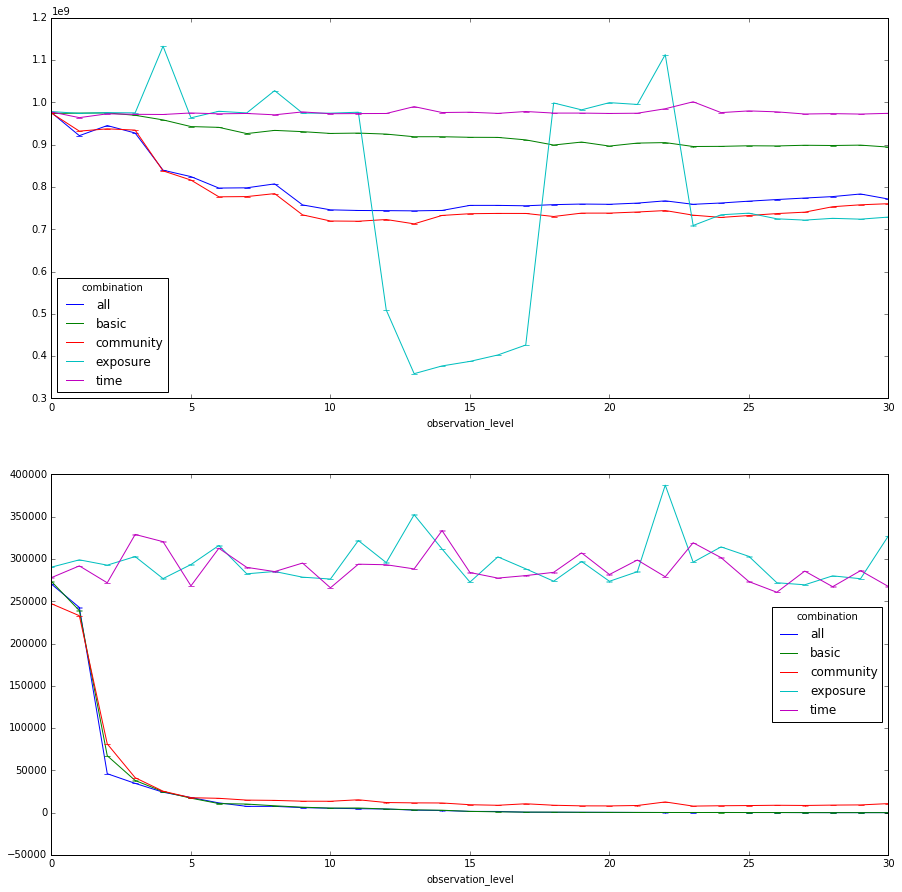

In [137]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.T.xs('activation_target', axis=1).plot(ax=a[0], yerr=dft_error.T.xs('activation_target', axis=1))
dft.T.xs('user_target', axis=1).plot(ax=a[1], yerr=dft_error.T.xs('user_target', axis=1))


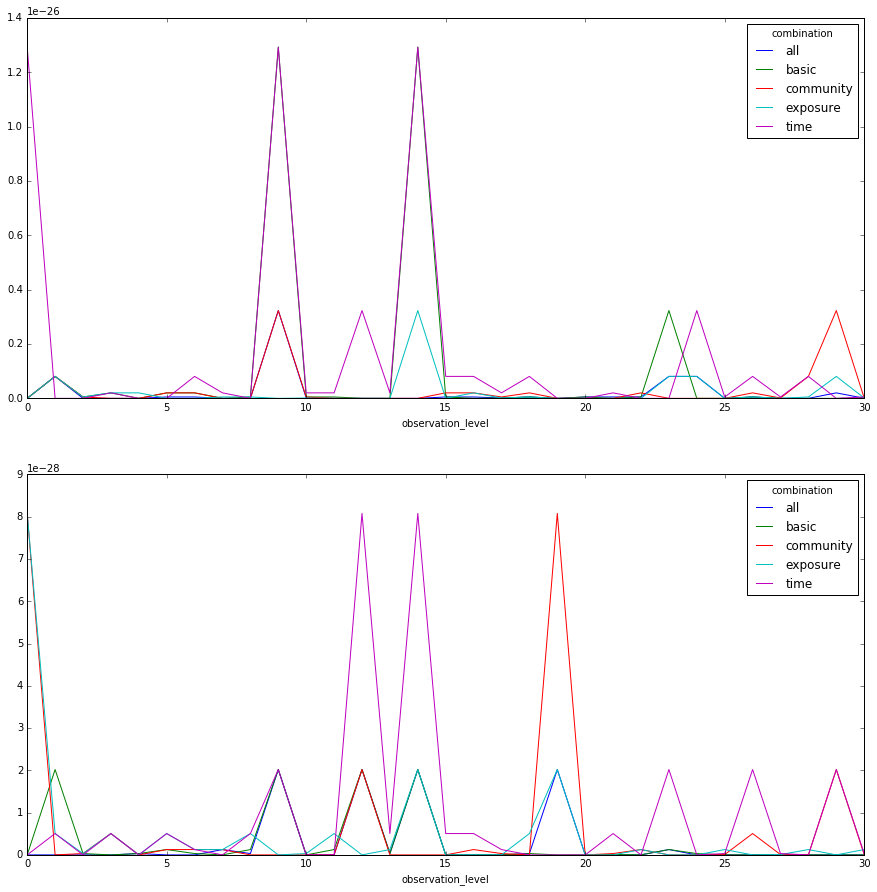

In [121]:
f, a = plt.subplots(2,1,figsize=(15,15))
dft.T.xs('activation_target', axis=1).plot(ax=a[0])
dft.T.xs('user_target', axis=1).plot(ax=a[1])

In [104]:
dft.T.xs('activation_target', axis=1)

combination,all,basic,community,exposure,time
observation_level,,,,,
0,1.323489e-23,1.323489e-23,0.000000e+00,0.000000e+00,0.000000e+00
1,5.169879e-26,5.169879e-26,5.169879e-26,5.169879e-26,5.169879e-26
2,3.308722e-24,1.323489e-23,3.308722e-24,1.323489e-23,1.323489e-23
3,3.308722e-24,3.308722e-24,0.000000e+00,0.000000e+00,3.308722e-24
4,0.000000e+00,1.323489e-23,1.323489e-23,0.000000e+00,1.323489e-23
5,0.000000e+00,3.231174e-27,0.000000e+00,3.231174e-27,0.000000e+00
6,1.292470e-26,3.231174e-27,0.000000e+00,0.000000e+00,1.292470e-26
7,0.000000e+00,0.000000e+00,1.292470e-26,1.292470e-26,0.000000e+00
8,0.000000e+00,3.231174e-27,5.169879e-26,0.000000e+00,1.292470e-26
